<center><font size="6"><b>Комп'ютерний практикум 5.

Лінійна регресія</b></font></center>

##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP5.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [1]:
# МІСЦЕ ДЛЯ КОДУ
import numpy as np
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

df = pd.read_csv(url)

### Завдання №2
Перевірте дані на пропущені значення, та при необхідності, поповніть їх 


In [2]:
# МІСЦЕ ДЛЯ КОДУ

# перевірка на пропущені значення
print(df.isnull().sum())

# поповнення пропущених значень у колонках "normalized-losses", "price", 'horsepower-binned', 'stroke' та "horsepower"
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['horsepower-binned'].fillna(df['horsepower-binned'].mode(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64


### Завдання №3
Побудуйте кореляційну матрицю для всього датафрейму, визначте найбільш суттєві змінні по кореляційному зв'язку


In [3]:
# МІСЦЕ ДЛЯ КОДУ

# побудова кореляційної матриці
corr_matrix = df.corr()

# відбір найбільш суттєвих змінних
top_corr_features = corr_matrix.index[abs(corr_matrix['price']) > 0.5]
top_corr_features

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km'],
      dtype='object')

### Завдання №4
Оберіть дві змінні, відмінні від лекційного прикладу
* побудуйте рівняння лінійної регресії
* виведіть коефіцієнти регресії
* знайдіть $R^2$ 
* знайдіть $MSE$
* побудуйте графік з точковим розподілом та рівнянням лінії регресії
* побудуйте графік залишків моделі
* зробіть висновки по моделі, проаналізуйте графік залишків, як ви вважаєте чи присутня автокореляція в моделі

Coefficients: [0.73988431]
Intercept: 9.532251825870375
R^2: 0.6767952186553199
MSE: 449.01200105450306


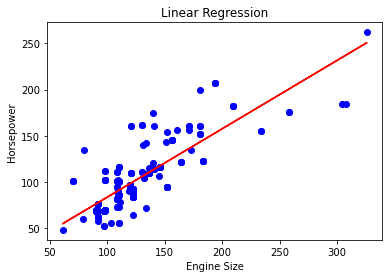

Text(0, 0.5, 'Residuals Values')

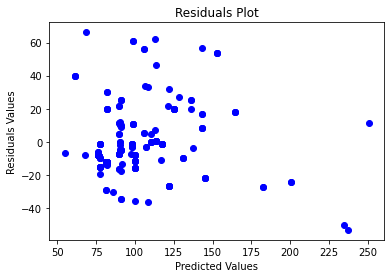

In [4]:
# МІСЦЕ ДЛЯ КОДУ

# побудова рівняння лінійної регресії
from sklearn.linear_model import LinearRegression

X = df[['engine-size']]
y = df['horsepower']

lr = LinearRegression()
lr.fit(X, y)

# виведення коефіцієнтів регресії
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

# знаходження R^2
from sklearn.metrics import r2_score

y_pred = lr.predict(X)
r2 = r2_score(y, y_pred)
print('R^2:', r2)

# знаходження MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

# побудова графіку з точковим розподілом та рівнянням лінії регресії
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

# побудова графіку залишків моделі
residuals = y - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Values')

#### Висновок
Явні закономірності на графіку залишків відсутні, розподіл має середнє близьке до нуля, а за характером відхилення нагадує гаусівський розподіл. З цього можна припустити, що автокореляція відсутня

### Завдання №5
Оберіть 5 змінних, відмінних від лекційного прикладу
* побудуйте рівняння множинної лінійної регресії
* виведіть коефіцієнти регресії
* знайдіть $R^2$ 
* знайдіть $MSE$
* зробіть висновки по моделі, як ви вважаєте чи присутня мультиколінеарність в моделі

Coefficients: [ 7.20965046e-01  1.84392132e-03  1.36935992e+01 -4.72869078e+01
  5.75725001e+01]
Intercept: -62.63236744179231
R^2: 0.7963974873415874
MSE: 282.8546386230105


Text(0, 0.5, 'Residuals Values')

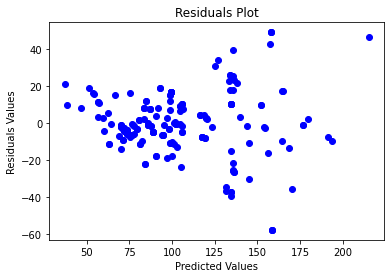

In [5]:
# МІСЦЕ ДЛЯ КОДУ

X = df[['compression-ratio', "peak-rpm", "city-L/100km", "length", "width"]]
y = df['horsepower']

lr = LinearRegression()
lr.fit(X, y)

# виведення коефіцієнтів регресії
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

# знаходження R^2
from sklearn.metrics import r2_score

y_pred = lr.predict(X)
r2 = r2_score(y, y_pred)
print('R^2:', r2)

# знаходження MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print('MSE:', mse)


# побудова графіку залишків моделі
residuals = y - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Values')

#### Висновок
Розподіл залишків має середнє близьке до нуля, проте дисперсія зростає при зростані прогнозованих значень. Це може свідчити про мультиколінеарність, проте графіка не достатньо щоб зробити остаточний висновок, необхідно проводити глибший аналіз з використанням статистичних тестів. 

### Завдання №6
Оберіть дві змінних з завдання 4
* побудуйте поліноміальну регресію порядку 2
* побудуйте поліноміальну регресію порядку 3
* побудуйте поліноміальну регресію порядку 4
* знайдіть $R^2$ для всих моделей
* знайдіть $MSE$ для всих моделей
* побудуйте графік з точковим розподілом та поліноміальними функціями
* зробіть висновки по моделям, враховуючи і лінійну регресію в завданні 4, оберіть найкращу на вашу думку модель.

R^2: 0.6932726871848546
MSE: 426.1206902082419


/home/fort/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


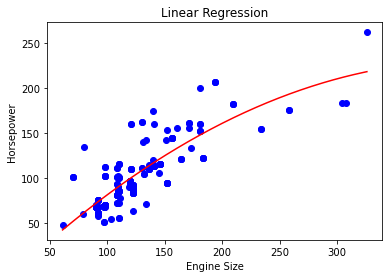

In [6]:
# МІСЦЕ ДЛЯ КОДУ

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Обрані змінні
X = df[['engine-size']]
y = df['horsepower']

# Побудова поліноміальної регресії порядку 2
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)
poly_reg_2 = LinearRegression().fit(X_poly_2, y)

# Прогнозування значень
y_pred_2 = poly_reg_2.predict(X_poly_2)

# Визначення коефіцієнта детермінації та MSE
from sklearn.metrics import r2_score, mean_squared_error
r2_2 = r2_score(y, y_pred_2)
mse_2 = mean_squared_error(y, y_pred_2)

print('R^2:', r2_2)
print('MSE:', mse_2)

# побудова графіку з точковим розподілом та рівнянням лінії регресії
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
xs = np.linspace(X["engine-size"].min(), X["engine-size"].max(), 300).reshape(-1, 1)
plt.plot(xs, poly_reg_2.predict(poly_2.transform(xs)), color='red')
plt.title('Linear Regression')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

R^2: 0.6960159404274515
MSE: 422.3096276901285


/home/fort/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


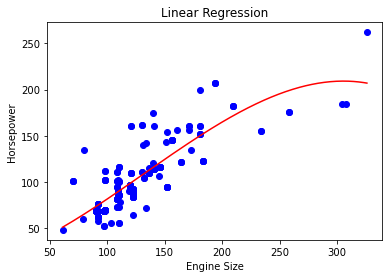

In [7]:
# Побудова поліноміальної регресії порядку 3
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
poly_reg_3 = LinearRegression().fit(X_poly_3, y)

# Прогнозування значень
y_pred_3 = poly_reg_3.predict(X_poly_3)

# Визначення коефіцієнта детермінації та MSE
r2_3 = r2_score(y, y_pred_3)
mse_3 = mean_squared_error(y, y_pred_3)

print('R^2:', r2_3)
print('MSE:', mse_3)

# побудова графіку з точковим розподілом та рівнянням лінії регресії
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
xs = np.linspace(X["engine-size"].min(), X["engine-size"].max(), 300).reshape(-1, 1)
plt.plot(xs, poly_reg_3.predict(poly_3.transform(xs)), color='red')
plt.title('Linear Regression')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

R^2: 0.7267184765316232
MSE: 379.65615234169155


/home/fort/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


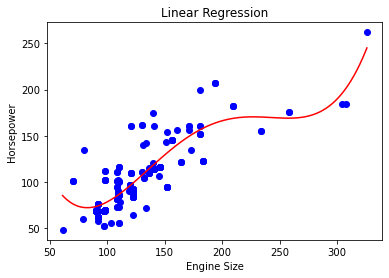

In [8]:
# Побудова поліноміальної регресії порядку 4
poly_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_4.fit_transform(X)
poly_reg_4 = LinearRegression().fit(X_poly_4, y)

# Прогнозування значень
y_pred_4 = poly_reg_4.predict(X_poly_4)

# Визначення коефіцієнта детермінації та MSE
r2_4 = r2_score(y, y_pred_4)
mse_4 = mean_squared_error(y, y_pred_4)

print('R^2:', r2_4)
print('MSE:', mse_4)

# побудова графіку з точковим розподілом та рівнянням лінії регресії
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
xs = np.linspace(X["engine-size"].min(), X["engine-size"].max(), 300).reshape(-1, 1)
plt.plot(xs, poly_reg_4.predict(poly_4.transform(xs)), color='red')
plt.title('Linear Regression')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

#### Висновок
Попри те, що поліноміальна модель 4 порядку показує найкращі показники коєфіцієнта детермінованості на середньоквадратичної похибки, на графіку ця модель виглядає дещо перенавченою, та може демонструвати низьку якість прогнозу поза межами тренувальних даних. В якості найкращої моделі, ймовірно, варто обрати модель 3го порядку, а точність прогнозу покращити, наприклад, залучивши додаткові змінні.